In [1]:
import fastai
import torch
import numpy

In [2]:
from fastai.vision import *
import torch.nn.functional as F
from fastai.layers import *

In [3]:
transforms = get_transforms(do_flip=False, max_rotate=5.0, max_zoom=1.0,
    max_warp=0.0) # Todo look at these
DATA_PATH = "C:/Code/Senior Project"
data = ImageItemList.from_csv(DATA_PATH, "labels.csv")

In [4]:
data = (data.random_split_by_pct()
            .label_from_df(cols=["throttle", "direction"],  label_cls=FloatList)
            .transform(transforms, size=224)
            .databunch())

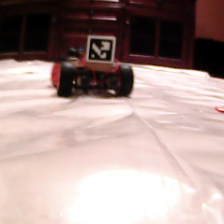

In [5]:
val_ds = data.valid_ds
img, label = val_ds[1]
img

In [10]:
reg_head = torch.nn.Sequential(Flatten(), torch.nn.Linear(86528, 2), SigmoidRange(-1, 1))
learn = create_cnn(data, models.squeezenet1_1, metrics=[], custom_head=reg_head, loss_func=F.mse_loss)

C:\Anaconda3\lib\site-packages\torchvision\models\squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  init.kaiming_uniform(m.weight.data)
C:\Anaconda3\lib\site-packages\torchvision\models\squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, mean=0.0, std=0.01)


In [12]:
learn.summary

<bound method model_summary of Learner(data=ImageDataBunch;

Train: LabelList
y: FloatList (2531 items)
[FloatItem [0. 0.], FloatItem [0. 0.], FloatItem [0. 0.], FloatItem [1. 0.], FloatItem [1. 0.]]...
Path: C:\Code\Senior Project
x: ImageItemList (2531 items)
[Image (3, 240, 320), Image (3, 240, 320), Image (3, 240, 320), Image (3, 240, 320), Image (3, 240, 320)]...
Path: C:\Code\Senior Project;

Valid: LabelList
y: FloatList (632 items)
[FloatItem [1. 0.], FloatItem [0. 0.], FloatItem [0. 0.], FloatItem [0. 0.], FloatItem [0. 0.]]...
Path: C:\Code\Senior Project
x: ImageItemList (632 items)
[Image (3, 240, 320), Image (3, 240, 320), Image (3, 240, 320), Image (3, 240, 320), Image (3, 240, 320)]...
Path: C:\Code\Senior Project;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2))
      (1): ReLU(inplace)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
      (3): Fire(
  

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


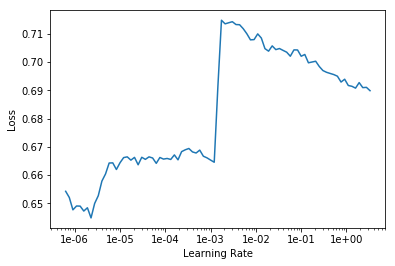

In [23]:
learn.recorder.plot()

In [15]:
epochs = 5
lr = 1e-3 # chosen using lr plot 
learn.fit_one_cycle(epochs, lr)

epoch,train_loss,valid_loss
1,0.673813,0.674994
2,0.678467,0.692528
3,0.672937,0.678462
4,0.672245,0.678418
5,0.670568,0.677739


In [16]:
learn.save("supervised", with_opt=False)

In [20]:
learn.load("supervised");

In [21]:
learn.unfreeze()

In [24]:
epochs = 3
lr = 1e-6 # lower on unfreeze
learn.fit_one_cycle(epochs, lr)

epoch,train_loss,valid_loss
1,0.667536,0.679247
2,0.666737,0.678281
3,0.672882,0.678977


In [19]:
learn.save("supervised", with_opt=False)

In [25]:
learn.predict(img)

(FloatItem [ 1. -1.], tensor([ 1., -1.]), tensor([ 1., -1.]))

In [26]:
print(label)

[0. 0.]


In [24]:
print(type(img))

<class 'fastai.vision.image.Image'>


In [27]:
learn.export()